<a href="https://colab.research.google.com/github/joykiriba/Moringa-DS-Core-Week2-IP-Finscope-Financial-Analysis/blob/main/%22Moringa_Data_Science_Core_W2_Independent_Project_2021_04_Joy_Kiriba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: An analysis of the factors that play a key role in the probability of individuals using or having bank accounts in Kenya, Uganda, Tanzania and Rwanda

##**1**. Defining the Question




### a) Specifying the Data Analytic Question

**How can we best predict which individuals are most likely to have or use a bank account?**

### b) Defining the Metric for Success
Deriving a high accuracy level from the analysis models we use.


### c) Understanding the context
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth. 
Our analysis will aid in shedding light on the best ways to predict the most likely individuals to access or use bank accounts. 

### d) Recording the Experimental Design
### The process will entail: 
1.) Obtaining dataset pertinent to our study
2.) Importing the necessary libraries, for data analysis, to our environment.
3.) Loading and viewing our data to better understand it.
4.) Finding and dealing with anomalies, outliers, missing values, and other unnecessary data within our dataset.
5.) Conducting our analysis by starting with univariate analysis, followed by bivariate and lastly multivariate analysis.
6.) We can then implement our solution.
7.) And finally, challenge the solution by providing recommendations on ways to improve.     


### e) Data Relevance
For a dataset to be relevant enough for this study it needs to include information collected from the four countries, Kenya, Uganda,Tanzania and Rwanda. It should also entail the various demographic factors that play a part in the financial outcomes of the individuals from the above countries.


##**2**. Reading the Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the Data from the source- Variable Definitions
# ---
# Dataset url = http://bit.ly/VariableDefinitions 
# ---
#
variable_definitions = pd.read_csv('http://bit.ly/VariableDefinitions ')


In [3]:
# Loading the Data from the source- main dataset
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
#
finance = pd.read_csv('http://bit.ly/FinancialDataset')

##**3**. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
finance.shape

(23524, 13)

In [12]:
# Previewing the variable definitions dataset
#
variable_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [13]:
# Previewing the top of our dataset
#
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [14]:
# Previewing the bottom of our dataset
# 
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [15]:
# Checking whether each column has an appropriate datatype
#
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [16]:
# to get general info on the dataframe

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [17]:
# to get a statistical summary of the dataframe(continuous variables)

finance.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [18]:
# to get a statistical summary of the whole dataframe, including the categorical variables

finance.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_510,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


##**4**. External Data Source Validation

### a.Validation

##**5**. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


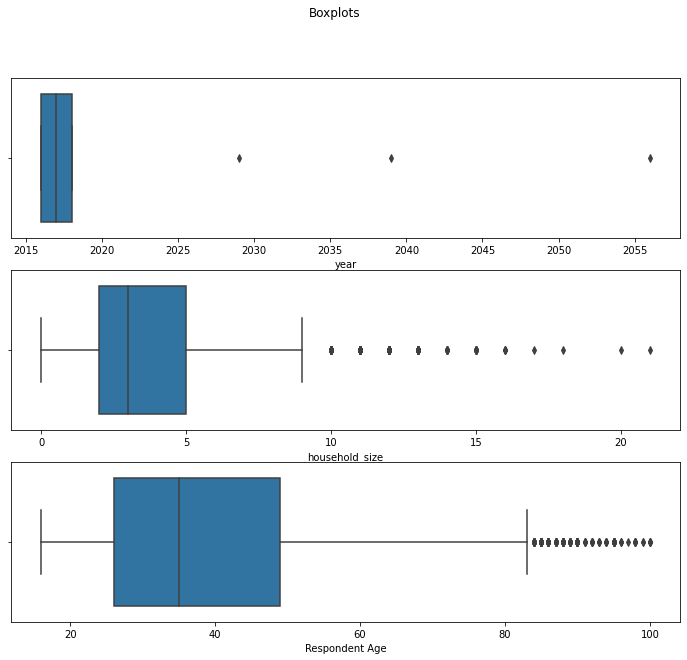

In [22]:
# Checking for Outliers

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12, 10))
fig.suptitle('Boxplots')
sns.boxplot(finance['year'], ax=ax1)
sns.boxplot(finance['household_size'], ax=ax2)
sns.boxplot(finance['Respondent Age'], ax=ax3)


we can see that there are outliers in all the 3 continuous variables: year, household_size and respondent age. We will therefore remove them as they will affect our analysis in areas like measure of central tendency and dispersion.

In [23]:
# getting rid of the outliers

Q1 = finance.quantile(0.25)
Q3 = finance.quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
finance_new = finance[~((finance < (Q1 - 1.5 * IQR)) | (finance > (Q3 + 1.5 * IQR))).any(axis=1)]
print(finance_new.shape)

year              2016.0
household_size       2.0
Respondent Age      26.0
Name: 0.25, dtype: float64
year              2018.0
household_size       5.0
Respondent Age      49.0
Name: 0.75, dtype: float64
year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
(22903, 13)


In [27]:
# Checking for Anomalies
# to remove white spaces, replace spaces in the column names with an underscore and lower the case of column names

finance_new.columns = finance.columns.str.strip().str.replace(' ', '_').str.lower()

# to rename a column name with a typo


finance_new.rename(columns= {'The_relathip_with_head':'The_relationship_with_head'}, inplace=True)
finance_new.columns


Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [28]:
# check for duplicates

finance_new.duplicated().sum()

# there are no duplicates 


0

In [29]:
# Identifying the Missing Data
#
# print(finance.isnull().any())

finance_new.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            27
respondent_age            33
gender_of_respondent      33
the_relathip_with_head     4
marital_status            31
level_of_educuation       29
type_of_job               30
dtype: int64

In [30]:
# Dealing with the Missing Data
#
finance_new = finance_new.dropna()
finance_new.shape

(22725, 13)

Finding Unique values in our columns

In [ ]:
finance_new['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [ ]:
finance_new['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
finance_new['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 9., 0.])

In [ ]:
finance_new['level_of_educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [ ]:
finance_new['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [ ]:
finance_new['respondent_age'].unique()

array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 43., 49., 44., 72., 53., 63., 39., 81., 78.,
       36., 20., 60., 23., 71., 57., 68., 41., 61., 75., 73., 74., 77.,
       82., 79., 83.])

##**6**. Exploratory Analysis

### 6.1 Univariate Analysis


#### Categorical variables. 
#### Among the 13 columns in the dataset we have 9 catogorical variables, which include: 'country', 'has_a_bank_account', 'type_of_location', 'cell_phone_access', 'gender_of_respondent', 'the_relationship_with_head', 'marital_status', 'level_of_educuation', 'type_of_job

In [ ]:
# Ploting the univariate summaries and recording our observations
# plotting a piechart for the country column

_names = ['Age', 'Income']
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(insurance_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

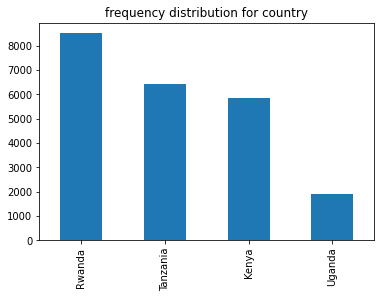

In [31]:
# Ploting the univariate summaries and recording our observations
# Country
# bar chart for country

finance_new['country'].value_counts().plot.bar(title='frequency distribution for country')


In [32]:
# frequency table for Year

finance_new['year'].value_counts()

2016    8512
2018    7789
2017    6424
Name: year, dtype: int64

In [33]:
# frequency table for 'has a bank account'

finance_new['has_a_bank_account'].value_counts()

No     19490
Yes     3235
Name: has_a_bank_account, dtype: int64

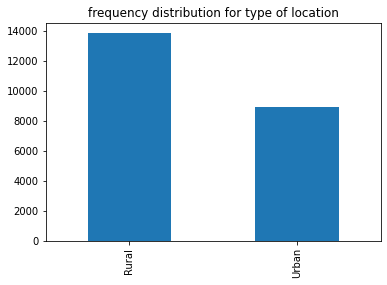

In [34]:
# Bar chart for type of location


finance_new['type_of_location'].value_counts().plot.bar(title='frequency distribution for type of location')


In [35]:
# frequency table for 'cell phone access'

finance_new['cell_phone_access'].value_counts()

Yes    16985
No      5740
Name: cell_phone_access, dtype: int64

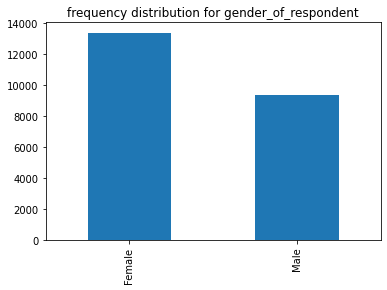

In [36]:
# Barchart for gender

finance_new['gender_of_respondent'].value_counts().plot.bar(title='frequency distribution for gender_of_respondent')


In [37]:
# frequency table for ''the_relationship_with_head''

finance_new['the_relathip_with_head'].value_counts()

Head of Household      12402
Spouse                  6361
Child                   2131
Parent                  1011
Other relative           640
Other non-relatives      180
Name: the_relathip_with_head, dtype: int64

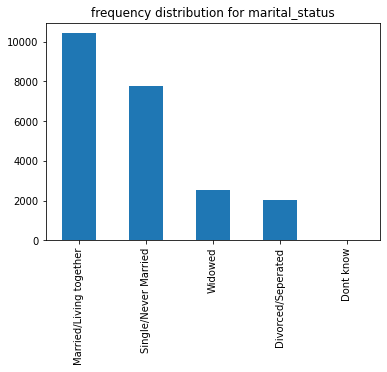

In [38]:
# Bar chart for 'marital_status'

finance_new['marital_status'].value_counts().plot.bar(title='frequency distribution for marital_status')

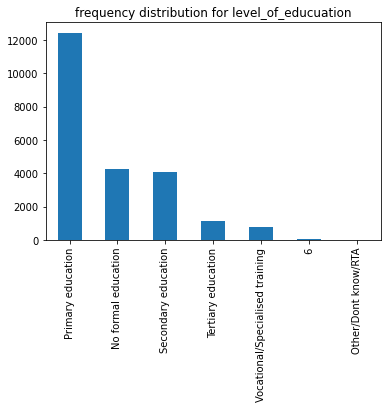

In [39]:
# Bar chart for 'level_of_educuation'

finance_new['level_of_educuation'].value_counts().plot.bar(title='frequency distribution for level_of_educuation')

In [40]:
#  frequency table for 'type_of_job'

finance_new['type_of_job'].value_counts()
    
      

Self employed                   6209
Informally employed             5490
Farming and Fishing             5296
Remittance Dependent            2375
Formally employed Private       1035
Other Income                    1026
No Income                        585
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: type_of_job, dtype: int64

#### Continuous Variables
#### Among the 13 columns we have 3 continuous variables: 'respondent_age', 'year' and 'household_size'.



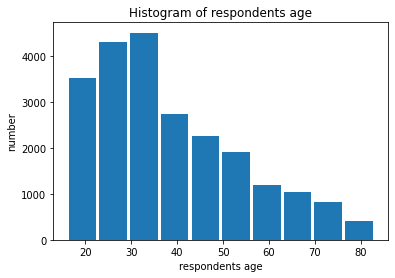

In [41]:
# Plotting a histogram to show distribution of the respondent's age

ages = finance_new['respondent_age']

plt.hist(ages, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('respondents age')
plt.ylabel('number')
plt.title('Histogram of respondents age') 
plt.show()

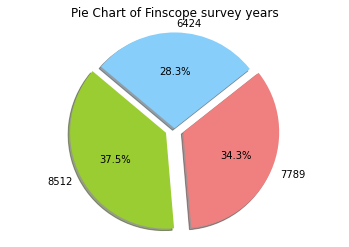

In [48]:
# Plotting a pie chart for the year

# Defining our labels, sizes, colors and explode 
years = finance_new['year'].value_counts()
# sizes  = [215, 130, 245, 210]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

# Highlights a particular Value in plot
explode = (0.1, 0.1, 0)  

# Plotting our pie chart
plt.pie(years, explode=explode, labels=years, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Finscope survey years')
plt.show()

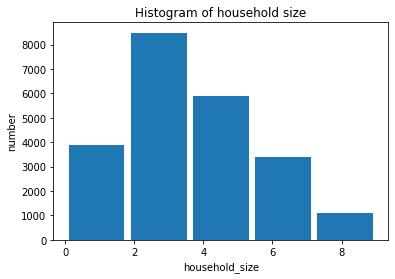

In [50]:
# plotting a histogram for the household size

household = finance_new['household_size']

plt.hist(household, bins=5, histtype='bar', rwidth=0.9)

plt.xlabel('household_size')
plt.ylabel('number')
plt.title('Histogram of household size') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


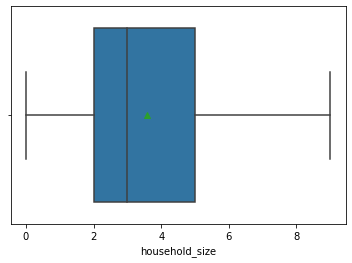

In [ ]:
sns.boxplot(finance_new["household_size"], showmeans=True)

##### a.) Measures of central tendency


In [51]:
# finding the mean age

finance_new['respondent_age'].mean()

38.34798679867987

In [52]:
# finding the median age

finance_new['respondent_age'].median()

35.0

In [53]:
# finding the mode

finance_new['respondent_age'].mode()

0    30.0
dtype: float64

In [54]:
# finding the mean household size

finance_new['household_size'].mean()

3.57984598459846

In [55]:
# finding the median household size

finance_new['household_size'].median()

3.0

In [56]:
# finding the mode household size

finance_new['household_size'].mode()

0    2.0
dtype: float64

##### b.) Measures of dispersion

In [57]:
# finding the standard deviation

finance_new['respondent_age'].std()

15.806141256107674

In [58]:
# finding the variance

finance_new['respondent_age'].var()

249.83410140802906

In [59]:
# finding the range

maximum = finance_new['respondent_age'].max()
minimum = finance_new['respondent_age'].min()
range = maximum - minimum
range

67.0

In [60]:
# finding the quantiles

finance_new['respondent_age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: respondent_age, dtype: float64

In [61]:
# computing skewness

finance_new['respondent_age'].skew()

0.7402138281724044

In [62]:
# computing kurtosis

finance_new['respondent_age'].kurt()

-0.23749387799691757

In [ ]:
# finding the standard deviation

finance_new['household_size'].std()

2.080542136724138

In [ ]:
# finding the variance

finance_new['household_size'].var()

4.328655582684643

In [ ]:
# finding the range

maximum1 = finance_new['household_size'].max()
minimum1 = finance_new['household_size'].min()
range1 = maximum1 - minimum1
range1

9.0

In [ ]:
# finding the quantiles

finance_new['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# computing skewness

finance_new['household_size'].skew()

0.6058745818063943

In [63]:
# computing kurtosis

finance_new['household_size'].kurt()

-0.5055780598336774

### 6.2 Bivariate Analysis

#### Numerical and numerical

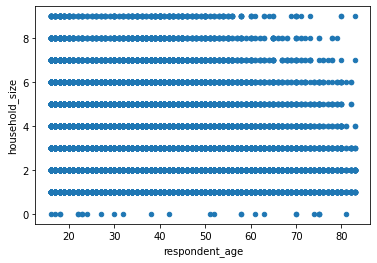

In [64]:
# plotting a scatter plot of the household size and respondents age

finance_new.plot(x = 'respondent_age', y = 'household_size', kind='scatter')


The scatter plot shows there's no correlation between the ages of the respondents in the sample and the house size.

In [65]:
# calculating the correlation coefficient

coeff =finance_new['respondent_age'].corr(finance_new['household_size']) 
print(coeff)


-0.1062088216975987


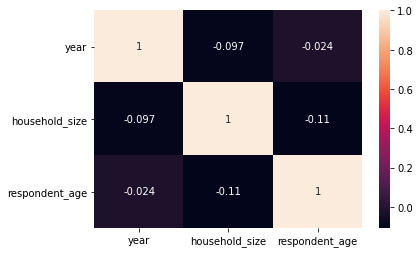

In [ ]:
sns.heatmap(finance_new.corr(),annot=True)
plt.show()

#### Categorical and categorical


Here we'll compare the categorical variables with the 'has_a_bank_account' variable to find out how each affects the latter.

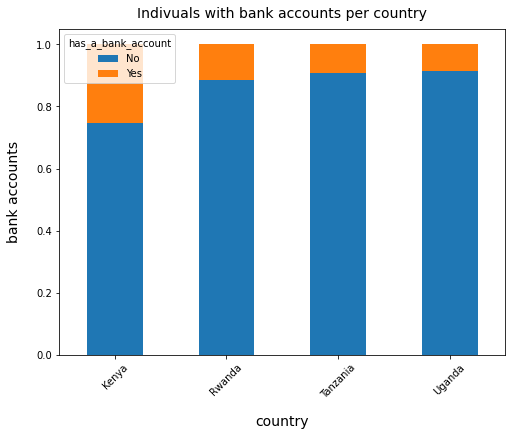

In [66]:
# plotting a stacked bar chart of country and has_a_bank_account

country = finance_new.groupby('country')['has_a_bank_account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts per country', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('country', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Kenya has more people with bank accounts

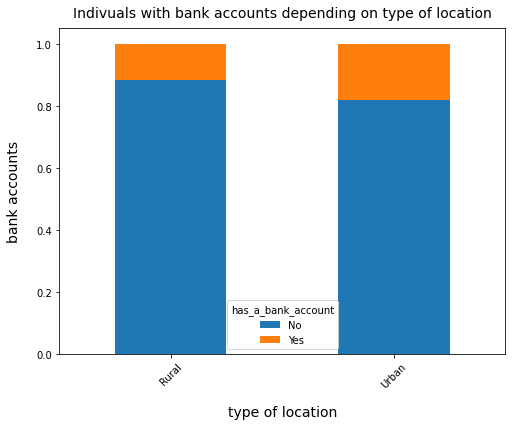

In [67]:
# plotting a stacked bar chart of type of location and has_a_bank_account

location = finance_new.groupby('type_of_location')['has_a_bank_account'].value_counts(normalize=True).unstack()
location.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on type of location', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('type of location', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

People in the urban areas are more likely to have or use bank accounts

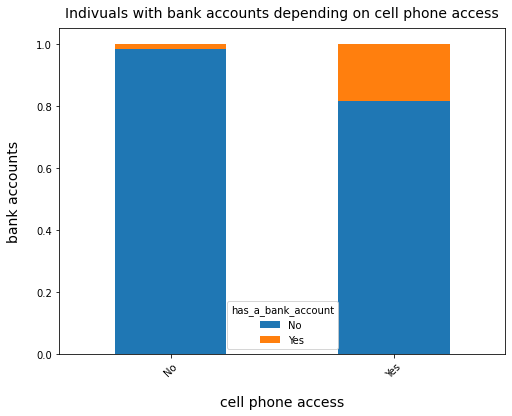

In [68]:
# # plotting a stacked bar chart of cell phone access and has_a_bank_account

phone_access = finance_new.groupby('cell_phone_access')['has_a_bank_account'].value_counts(normalize=True).unstack()
phone_access.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on cell phone access', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('cell phone access', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Individuals with phone access are more likely to have bank accounts

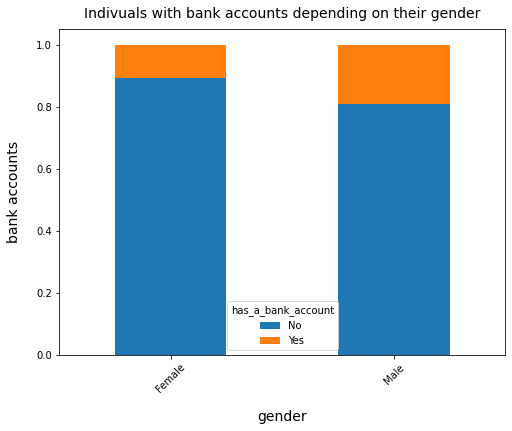

In [69]:
# # plotting a stacked bar chart of gender and has_a_bank_account

gender = finance_new.groupby('gender_of_respondent')['has_a_bank_account'].value_counts(normalize=True).unstack()
gender.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on their gender', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('gender', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Males are more likely to have bank accounts as compared to females

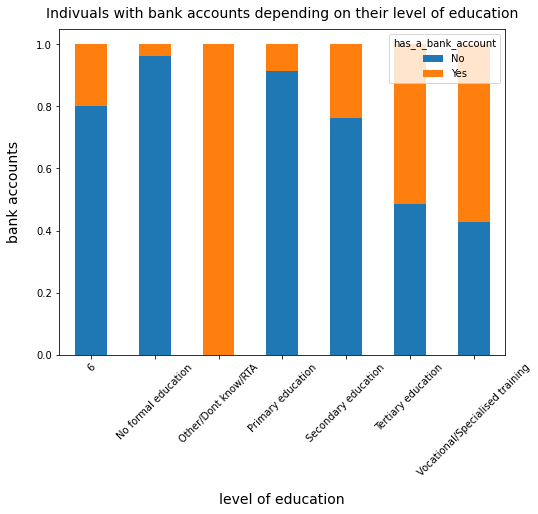

In [ ]:
# plotting a stacked bar chart of level of education and has_a_bank_account

education = finance_new.groupby('level_of_educuation')['has_a_bank_account'].value_counts(normalize=True).unstack()
education.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on their level of education', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('level of education', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Indidviduals in vocational training are more likely to have bank accounts

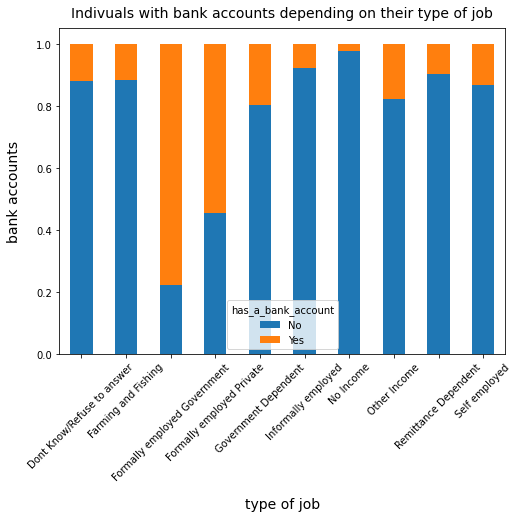

In [ ]:
# plotting a stacked bar chart of type of job and has_a_bank_account

job_type = finance_new.groupby('type_of_job')['has_a_bank_account'].value_counts(normalize=True).unstack()
job_type.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on their type of job', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('type of job', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Those employed in the government are more likely to have bank accounts because they have a higher percentage of positive feedback to having bank accounts. They are followed by those that are privately employed.


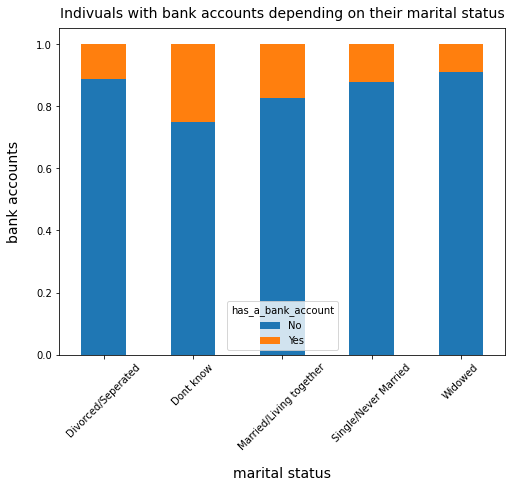

In [70]:
# plotting a stacked bar chart of marital status and has_a_bank_account
maritalstatus = finance_new.groupby('marital_status')['has_a_bank_account'].value_counts(normalize=True).unstack()
maritalstatus.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Indivuals with bank accounts depending on their marital status', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('bank accounts', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('marital status', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Those that declined to give their marital status are more likely to have bank accounts followed by those that are married or living with their partner

#### Numerical and Categorical

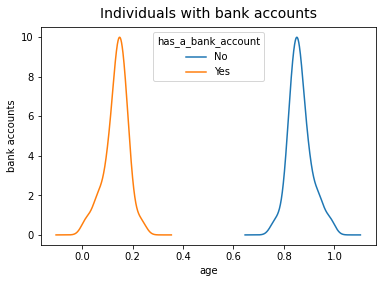

In [71]:
# Plotting our line graph
finance_new.groupby('respondent_age')['has_a_bank_account'].value_counts(normalize=True).unstack().plot(kind='kde')
# finance_new[["has_a_bank_account"]].value_counts().unstack().plot()

# Giving a title to our line graph
plt.title('Individuals with bank accounts', fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('bank accounts')

# Labelling the x-axis
plt.xlabel('age')
 
# Displaying our graph
plt.show()

### 6.3 Multivariate Analysis

#### Principal Component Analysis

In [72]:
# we'll first make a copy of our dataframe on which we'll perform the the test on

finance_df = finance_new.copy()
finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [73]:
# we then import label encoder to convert our categorical data into numbers 
# that our predictive models can better understand

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

finance_df['country']=lb.fit_transform(finance_df['country'].astype(str))
finance_df['type_of_location']=lb.fit_transform(finance_df['type_of_location'].astype(str))
finance_df['cell_phone_access']=lb.fit_transform(finance_df['cell_phone_access'].astype(str))
finance_df['gender_of_respondent']=lb.fit_transform(finance_df['gender_of_respondent'].astype(str))
finance_df['the_relathip_with_head']=lb.fit_transform(finance_df['the_relathip_with_head'].astype(str))
finance_df['marital_status']=lb.fit_transform(finance_df['marital_status'].astype(str))
finance_df['level_of_educuation']=lb.fit_transform(finance_df['level_of_educuation'].astype(str))
finance_df['type_of_job']=lb.fit_transform(finance_df['type_of_job'].astype(str))

finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5


In [74]:
# we then drop unnecessary columns

finance_df.drop(['uniqueid'], axis=1, inplace=True)
finance_df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,0,2018,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,No,1,0,8.0,26.0,1,0,3,3,5


In [76]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = finance_df.drop('has_a_bank_account', 1)
y = finance_df['has_a_bank_account']
print(X)
print(y)

       country  year  ...  level_of_educuation  type_of_job
0            0  2018  ...                    4            9
1            0  2018  ...                    1            4
2            0  2018  ...                    6            9
3            0  2018  ...                    3            3
4            0  2018  ...                    3            5
...        ...   ...  ...                  ...          ...
23512        3  2018  ...                    1            7
23519        3  2018  ...                    1            7
23520        3  2018  ...                    4            7
23521        3  2018  ...                    3            7
23522        3  2018  ...                    4            9

[22725 rows x 11 columns]
0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23512     No
23519     No
23520     No
23521     No
23522     No
Name: has_a_bank_account, Length: 22725, dtype: object


In [77]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 

#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       country  year  ...  level_of_educuation  type_of_job
 20265        2  2017  ...                    3            9
 20845        2  2017  ...                    3            9
 21432        3  2018  ...                    1            9
 12659        1  2016  ...                    3            5
 16087        2  2017  ...                    5            3
 ...        ...   ...  ...                  ...          ...
 13500        1  2016  ...                    1            5
 20232        2  2017  ...                    1            8
 10127        1  2016  ...                    5            2
 11097        1  2016  ...                    3            5
 2834         0  2018  ...                    6            1
 
 [18180 rows x 11 columns],
        country  year  ...  level_of_educuation  type_of_job
 7808         1  2016  ...                    1            1
 10042        1  2016  ...                    4            1
 18864        2  2017  ...                    1        

In [78]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.87642222  0.03595449  1.24246716 ...  0.61870581 -0.00733443
   1.15881153]
 [ 0.87642222  0.03595449  1.24246716 ...  0.61870581 -0.00733443
   1.15881153]
 [ 1.96536126  1.21796661 -0.80485025 ... -0.38675335 -1.67408413
   1.15881153]
 ...
 [-0.21251682 -1.14605762  1.24246716 ... -0.38675335  1.65941526
  -1.10446167]
 [-0.21251682 -1.14605762 -0.80485025 ...  0.61870581 -0.00733443
  -0.13448744]
 [-1.30145585  1.21796661 -0.80485025 ... -0.38675335  2.49279011
  -1.42778641]]
[[-0.21251682 -1.14605762 -0.80485025 ... -0.38675335 -1.67408413
  -1.42778641]
 [-0.21251682 -1.14605762 -0.80485025 ... -0.38675335  0.82604042
  -1.42778641]
 [ 0.87642222  0.03595449  1.24246716 ... -0.38675335 -1.67408413
   1.15881153]
 ...
 [-0.21251682 -1.14605762 -0.80485025 ...  0.61870581  0.82604042
  -1.42778641]
 [-0.21251682 -1.14605762 -0.80485025 ... -0.38675335 -1.67408413
  -0.13448744]
 [-1.30145585  1.21796661 -0.80485025 ... -0.38675335 -0.00733443
  -1.42778641]]


In [79]:
# Applying PCA 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)
print(X_test)

[[ 2.64669241  0.75819519 -1.3123034  ...  0.30342403  0.15412583
  -0.49596979]
 [ 2.85775469  0.61843391 -1.32143088 ... -0.0098906   0.30800352
  -0.54325541]
 [ 0.75166606  1.53858936 -0.38421377 ...  0.01526601 -0.60156059
   1.80678434]
 ...
 [-1.20592978 -1.18571845  1.05696515 ...  1.90558567 -0.58016153
   0.2616894 ]
 [-0.37023869  0.26483143 -0.56863843 ...  0.17426182  0.79860341
  -1.51159031]
 [-2.04390152 -2.91081132  0.95051142 ...  0.99269864  0.05928733
   0.42026887]]
[[-2.0052661   1.16403945 -2.11051308 ... -0.64176785  0.86821704
   0.17726565]
 [-2.16240744 -0.73937165  0.67558462 ...  0.78293071  0.02123862
   0.02060463]
 [ 1.89742755  2.28900328  0.50147912 ...  0.01438762 -1.07540505
   0.69790789]
 ...
 [-1.64672557 -0.93389112  1.1118565  ... -0.13993593  0.51747473
   0.11410141]
 [-0.99844527  1.32951322  0.5433402  ... -0.51937344  0.07375444
  -0.48612714]
 [-2.71696919 -1.21994779  0.47166421 ...  0.34190441  0.78221566
   0.54713167]]


In [80]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.1825506 , 0.1495114 , 0.14198433, 0.10227957, 0.087048  ,
       0.07485691, 0.06894082, 0.06022762, 0.0522532 , 0.04231575,
       0.0380318 ])

In [81]:
# using one principal component to train our algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_test)
print(X_train)

[[-2.0052661 ]
 [-2.16240744]
 [ 1.89742755]
 ...
 [-1.64672557]
 [-0.99844527]
 [-2.71696919]]
[[ 2.64669241]
 [ 2.85775469]
 [ 0.75166606]
 ...
 [-1.20592978]
 [-0.37023869]
 [-2.04390152]]


In [84]:
# Training and Making Predictions using random forest classification
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting from the output that with only one feature, 
# the random forest algorithm is able to correctly predict at an accuracy of 85.72%.

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [85]:
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
# Predicting the Test set results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


In [ ]:
# finding results with the full feature set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# predicting the results

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


Principal Component Analysis gives an 85.72% accuracy which is quite high making it a good method to conduct multivariate analysis

#### Linear Discriminant Analysis

In [89]:
# first step is to divide the dataset into features and corresponding labels
# then divide the resultant dataset into training and test sets. 
#

b = finance_df.drop('has_a_bank_account', 1)
k = finance_df['has_a_bank_account']
print(b)
print(k)


       country  year  ...  level_of_educuation  type_of_job
0            0  2018  ...                    4            9
1            0  2018  ...                    1            4
2            0  2018  ...                    6            9
3            0  2018  ...                    3            3
4            0  2018  ...                    3            5
...        ...   ...  ...                  ...          ...
23512        3  2018  ...                    1            7
23519        3  2018  ...                    1            7
23520        3  2018  ...                    4            7
23521        3  2018  ...                    3            7
23522        3  2018  ...                    4            9

[22725 rows x 11 columns]
0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23512     No
23519     No
23520     No
23521     No
23522     No
Name: has_a_bank_account, Length: 22725, dtype: object


In [90]:
# dividing the dataset into training and test sets

from sklearn.model_selection import train_test_split
b_train, b_test, k_train, k_test = train_test_split(b, k, test_size=0.2, random_state=0)
b_train, b_test, k_train, k_test

(       country  year  ...  level_of_educuation  type_of_job
 20265        2  2017  ...                    3            9
 20845        2  2017  ...                    3            9
 21432        3  2018  ...                    1            9
 12659        1  2016  ...                    3            5
 16087        2  2017  ...                    5            3
 ...        ...   ...  ...                  ...          ...
 13500        1  2016  ...                    1            5
 20232        2  2017  ...                    1            8
 10127        1  2016  ...                    5            2
 11097        1  2016  ...                    3            5
 2834         0  2018  ...                    6            1
 
 [18180 rows x 11 columns],
        country  year  ...  level_of_educuation  type_of_job
 7808         1  2016  ...                    1            1
 10042        1  2016  ...                    4            1
 18864        2  2017  ...                    1        

In [91]:
# Feature scaling
#
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
b_train = sc.fit_transform(b_train)
b_test = sc.transform(b_test)
b_train
b_test

array([[-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
        -1.67408413, -1.42778641],
       [-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
         0.82604042, -1.42778641],
       [ 0.87642222,  0.03595449,  1.24246716, ..., -0.38675335,
        -1.67408413,  1.15881153],
       ...,
       [-0.21251682, -1.14605762, -0.80485025, ...,  0.61870581,
         0.82604042, -1.42778641],
       [-0.21251682, -1.14605762, -0.80485025, ..., -0.38675335,
        -1.67408413, -0.13448744],
       [-1.30145585,  1.21796661, -0.80485025, ..., -0.38675335,
        -0.00733443, -1.42778641]])

In [92]:
# Peforming LDA
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
b_train = lda.fit_transform(b_train, k_train)
b_test = lda.transform(b_test)
b_train
b_test

array([[-1.59134088],
       [ 0.91195258],
       [-1.52670731],
       ...,
       [ 0.49584398],
       [-2.11618703],
       [ 0.66164617]])

In [93]:
# Step 7: Training and Making Predictions using the random forest classifier 
# to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(b_train, k_train)
k_pred = classifier.predict(b_test)
k_pred



array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [94]:
# Evaluating the Performance of the algorithm 
# To find the accuracy of the prediction, we'll use a confusion matrix
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(k_test, k_pred)
print(cm)
print('Accuracy' + str(accuracy_score(k_test, k_pred)))

[[3792  104]
 [ 468  181]]
Accuracy0.8741474147414742


Linear Discriminant Analysis has an accuracy level of 87.41% making it a viable method to conduct multivariate analysis.

##**7**. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

##**8**. Challenging the solution

The two prediction methods used here, Principal Component Analysis and Linear Discriminant Analysis, gave accuracy levels of 85.72% and 87.41%, respectively. This shows there's still room for improvement in terms of the accuracy score.




##**9**. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did, we had a good sample size that looked into key factors that affect the financial state of people from different social backgrounds.



### b). Do we need other data to answer our question?
Not necessarily because the dataset we used answered our question.

### c). Did we have the right question?

Yes we did, the results to our analysis have helped give an insight to the state of financial inclusion in the 4 East African countries Kenya, Rwanda, Tanzania, and Uganda. We have also been able to define some key factors that affect the various financial states of individuals.